***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df_dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
df_dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [df_dados.Renda.min(), 2*788, 5*788, 15*788, 25*788, df_dados.Renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [47]:
frequencia = pd.cut(x = df_dados.Renda, bins=classes, labels=labels, include_lowest=True).value_counts()
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [48]:
normalizado = pd.cut(x = df_dados.Renda, bins=classes, labels=labels, include_lowest=True).value_counts(normalize=True)
normalizado

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

In [49]:
percentuais = normalizado * 100
percentuais.round(2)

E    64.75
D    24.21
C     9.42
B     1.07
A     0.55
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [50]:
df_frequncia_renda = pd.DataFrame({'frequencia':frequencia, 'porcentual':percentuais}).sort_index(ascending=False)
df_frequncia_renda

,frequencia,porcentual
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

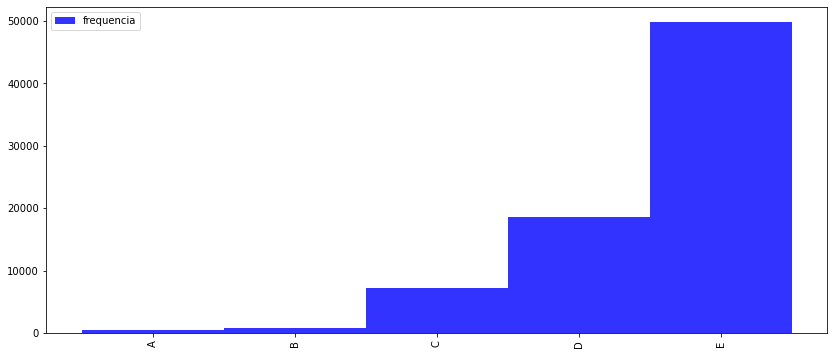

In [53]:
df_frequncia_renda.plot.bar(width=1, y='frequencia', color='blue', alpha=0.8, figsize=(14, 6))

> ### Conclusões

Grande parte da população se concentra na classe E, com gonhos até 2 salários mínimos.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\renat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'histograma - Idade'}, xlabel='Anos'>

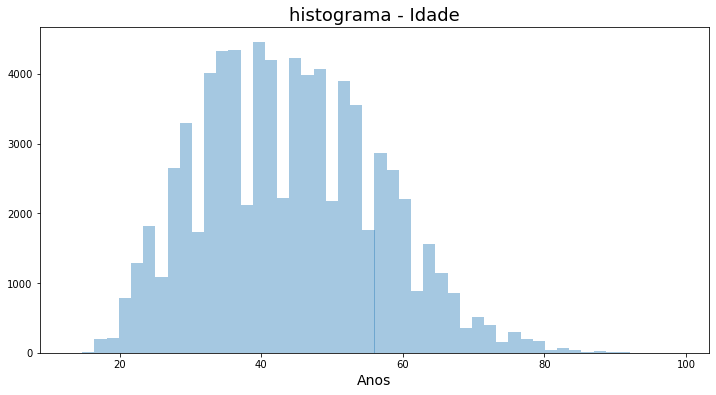

In [11]:
ax = sns.distplot(df_dados.Idade, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('histograma - Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)

ax

<AxesSubplot:title={'center':'histograma - Anos de Estudo'}, xlabel='Anos'>

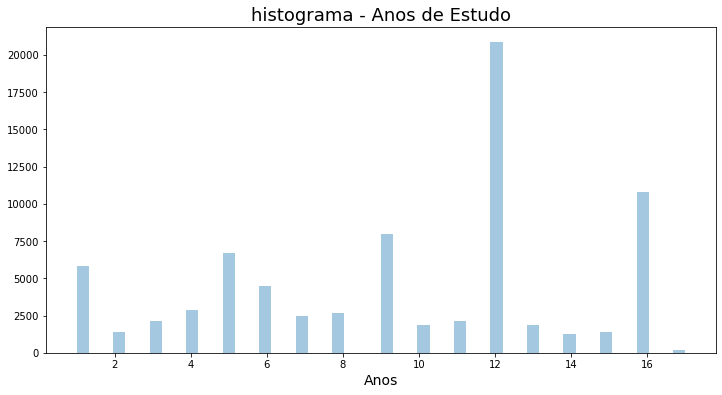

In [12]:
ax = sns.distplot(df_dados['Anos de Estudo'], kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('histograma - Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)

ax

<AxesSubplot:title={'center':'histograma - Renda'}, xlabel='Anos'>

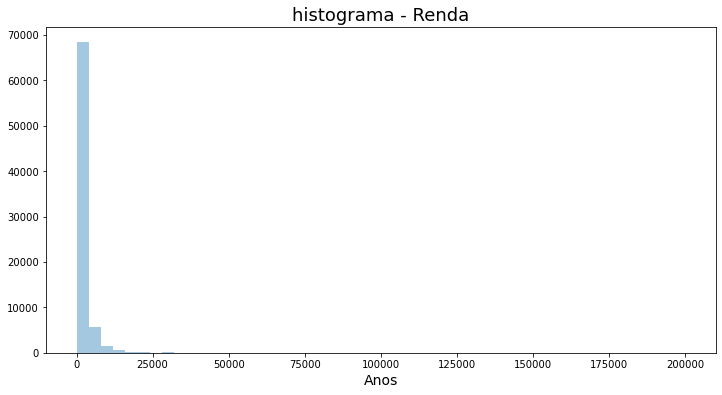

In [13]:
ax = sns.distplot(df_dados['Renda'], kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('histograma - Renda', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)

ax

<AxesSubplot:title={'center':'histograma - Altura'}, xlabel='Anos'>

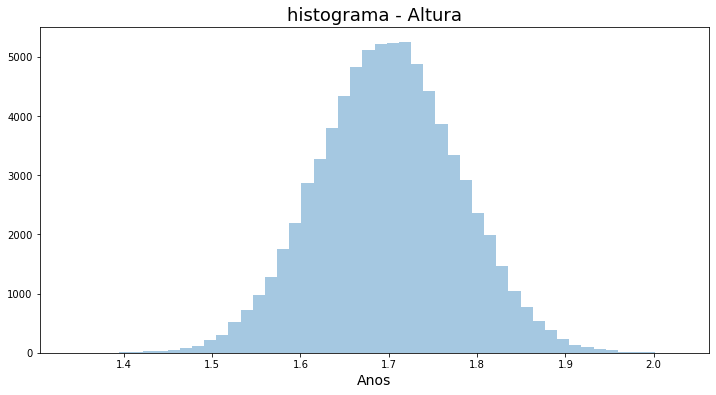

In [14]:
ax = sns.distplot(df_dados['Altura'], kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('histograma - Altura', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)

ax

> ### Conclusões

Público concentrado entre 30 e 60 anos de idade, e maior quantidade com 12 anos de estudo o que representa a conclusão do ensino médio, renda predominante próxima a um salário mínimo e para o dado artificial altura com população média de 1,8mt.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\renat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'histograma - Renda até R$20.000'}, xlabel='Anos', ylabel='Density'>

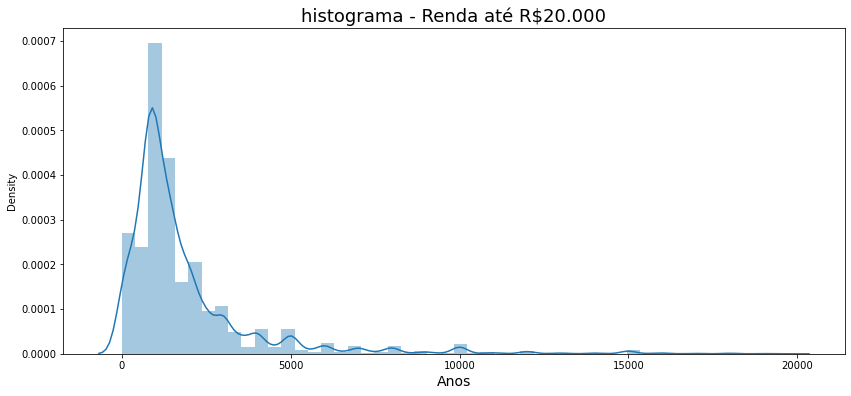

In [55]:
ax = sns.distplot(df_dados.query('Renda < 20000')['Renda'], kde=True)

ax.figure.set_size_inches(14, 6)
ax.set_title('histograma - Renda até R$20.000', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)

ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [76]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [17]:
# tabela de frequências
frequencia = pd.crosstab(df_dados.Sexo, df_dados.Cor)
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns= cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [18]:
# tabela de porcentual
frequencia = pd.crosstab(df_dados.Sexo, df_dados.Cor, normalize=True) *100
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns= cor, inplace=True)
frequencia.round(2)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

Homens são a grande maioria dos provedores do lar, e a regra é mantida mesmo quando especificamos uma cor. Os branco e Pardos são os maiores provedores independente do sexo.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [19]:
df_dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [20]:
df_dados.Renda.median()

1200.0

### Obtenha a moda

In [56]:
df_dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [22]:
df_dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [23]:
df_dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [24]:
df_dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [25]:
renda_sexo = df_dados.groupby('Sexo').aggregate({'Renda': [min, max, sum, np.mean, np.median, np.var, np.std, np.count_nonzero]})
renda_sexo.rename(index= sexo, inplace=True)
renda_sexo

Renda                                                        \
            min     max        sum         mean  median           var   
Sexo                                                                    
Masculino     0  200000  116747515  2192.441596  1350.0  1.289035e+07   
Feminino      0  120000   36961930  1566.847393   900.0  6.608310e+06   

                                      
                   std count_nonzero  
Sexo                                  
Masculino  3590.312915         51420  
Feminino   2570.663414         22553

In [26]:
renda_sexo = df_dados.groupby('Cor').aggregate({'Renda': [min, max, sum, np.mean, np.median, np.var, np.std, np.count_nonzero]})
renda_sexo.rename(index= cor, inplace=True)
renda_sexo

Renda                                                       \
           min     max       sum         mean  median           var   
Cor                                                                   
Indígena     0  120000    525821  1472.887955   788.0  4.159087e+07   
Branca       0  200000  85233000  2679.019331  1500.0  1.908087e+07   
Preta        0   50000  12102296  1442.294840  1000.0  3.135141e+06   
Amarela      0   50000   1472388  4182.920455  2450.0  2.723900e+07   
Parda        0  100000  54375940  1513.596103  1000.0  4.548909e+06   

                                     
                  std count_nonzero  
Cor                                  
Indígena  6449.098217           309  
Branca    4368.165306         30938  
Preta     1770.632912          8076  
Amarela   5219.099832           348  
Parda     2132.817184         34302

In [27]:
pd.pivot_table(
    df_dados, 
    index=['Sexo', 'Cor'],
    values=['Renda'],
    aggfunc={'Renda': [min, max, sum, np.mean, np.median, np.var, np.std, np.count_nonzero]}
).round(2)

Renda                                                        \
         count_nonzero       max     mean  median  min       std         sum   
Sexo Cor                                                                       
0    0           216.0   10000.0  1081.71   797.5  0.0   1204.09    276918.0   
     2         21606.0  200000.0  2925.74  1700.0  0.0   4750.79  64933972.0   
     4          5320.0   50000.0  1603.86  1200.0  0.0   1936.31   8824447.0   
     6           233.0   50000.0  4758.25  2800.0  0.0   5740.82   1118189.0   
     8         24045.0  100000.0  1659.58  1200.0  0.0   2312.09  41593989.0   
1    0            93.0  120000.0  2464.39   788.0  0.0  11957.50    248903.0   
     2          9332.0  100000.0  2109.87  1200.0  0.0   3251.01  20299028.0   
     4          2756.0   23000.0  1134.60   800.0  0.0   1349.80   3277849.0   
     6           115.0   20000.0  3027.34  1500.0  0.0   3731.17    354199.0   
     8         10257.0   30000.0  1176.76   800.0  0.0   1596.23  12781951.0   

                        
                   var  
Sexo Cor                
0    0    1.449841e+06  
     2    2.257002e+07  
     4    3.749294e+06  
     6    3.295707e+07  
     8    5.345747e+06  
1    0    1.429818e+08  
     2    1.056909e+07  
     4    1.821960e+06  
     6    1.392166e+07  
     8    2.547960e+06

In [57]:
frequencia = pd.crosstab(df_dados.Cor, df_dados.Sexo, aggfunc=['mean', 'median', 'max'], values=df_dados.Renda)
frequencia.rename(index = cor, inplace=True)
frequencia.rename(columns = sexo, inplace=True)
frequencia

mean                 median                max         
Sexo        Masculino     Feminino Masculino Feminino Masculino Feminino
Cor                                                                     
Indígena  1081.710938  2464.386139     797.5    788.0     10000   120000
Branca    2925.744435  2109.866750    1700.0   1200.0    200000   100000
Preta     1603.861687  1134.596400    1200.0    800.0     50000    23000
Amarela   4758.251064  3027.341880    2800.0   1500.0     50000    20000
Parda     1659.577425  1176.758516    1200.0    800.0    100000    30000

> ### Conclusões

Homens de cor amarela possuem os maiores salários na média.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [60]:
frequencia = pd.crosstab(df_dados.Cor, df_dados.Sexo, aggfunc=['mad', 'var', 'std'], values=df_dados.Renda).round(2)
frequencia.rename(index = cor, inplace=True)
frequencia.rename(columns = sexo, inplace=True)
frequencia

mad                   var                     std          
Sexo     Masculino Feminino    Masculino      Feminino Masculino  Feminino
Cor                                                                       
Indígena    798.91  3007.89   1449841.13  1.429818e+08   1204.09  11957.50
Branca     2261.01  1670.97  22570023.41  1.056909e+07   4750.79   3251.01
Preta       975.60   705.45   3749293.59  1.821960e+06   1936.31   1349.80
Amarela    3709.60  2549.15  32957069.62  1.392166e+07   5740.82   3731.17
Parda      1125.83   811.58   5345747.15  2.547960e+06   2312.09   1596.23

> ### Conclusões

A dispersão entre as mulheres indígenas é muito grande.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [66]:
cor

{0: 'Indígena',
 2: 'Branca',
 4: 'Preta',
 6: 'Amarela',
 8: 'Parda',
 9: 'Sem declaração'}

In [71]:
df_dados['Cor'].value_counts()

8    35925
2    31815
4     8391
0      357
6      352
Name: Cor, dtype: int64

<AxesSubplot:title={'center':' Box-plot da RENDA segundo SEXO e COR'}, xlabel='R$', ylabel='Cor'>

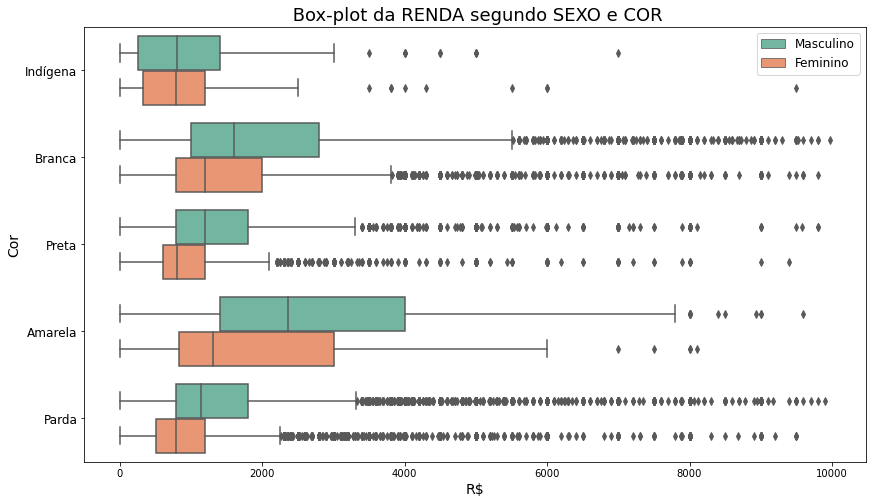

In [108]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue='Sexo', data = df_dados.query('Renda < 10000'), orient = 'h', palette='Set2')

ax.figure.set_size_inches(14, 8)
ax.set_title(' Box-plot da RENDA segundo SEXO e COR' , fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor'  , fontsize=14)

# Configurando label do eixo X
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)

# Configurando label da legenda
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [111]:
from scipy import stats

percentual = stats.percentileofscore(df_dados.Renda, 788, kind='weak') # weak - até o último 788
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [33]:
df_dados.Renda.quantile(q=0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [34]:
separatrizes = pd.crosstab(df_dados['Anos de Estudo'], df_dados.Sexo, aggfunc=['mean', 'median', 'max', 'std'], values=df_dados.Renda)
separatrizes.rename(columns = sexo, inplace=True)
separatrizes.round(2)

mean             median                max           \
Sexo           Masculino Feminino Masculino Feminino Masculino Feminino   
Anos de Estudo                                                            
1                 799.49   516.20       700      390     30000    10000   
2                 895.63   492.77       788      400     30000     2000   
3                 931.18   529.91       788      450     40000     4000   
4                1109.20   546.85       800      500     80000     3500   
5                1302.33   704.28      1000      788     50000    10000   
6                1338.65   781.39      1045      788     35000     8000   
7                1448.88   833.73      1200      788     25000     6000   
8                1465.50   830.75      1200      788     40000     9000   
9                1639.40   933.62      1300      800     30000    18000   
10               1508.04   868.02      1200      788     60000    20000   
11               1731.27   925.92      1218      800     45000     6000   
12               2117.06  1286.79      1500     1000    200000   100000   
13               2470.33  1682.31      1800     1200     30000   120000   
14               3195.10  1911.73      2400     1300     25000    20000   
15               3706.62  2226.46      2500     1600     50000    20000   
16               6134.28  3899.51      4000     2800    200000   100000   
17               1295.76   798.17      1200      788      7000     3000   

                     std           
Sexo           Masculino Feminino  
Anos de Estudo                     
1                1023.90   639.31  
2                1331.95   425.29  
3                1435.17   498.23  
4                2143.80   424.12  
5                1419.82   629.55  
6                1484.65   635.78  
7                1476.63   574.55  
8                1419.71   602.04  
9                1515.58   896.78  
10               2137.66   973.22  
11               2078.61   620.61  
12               2676.54  1819.04  
13               2268.08  4851.83  
14               2797.12  2053.79  
15               3987.21  2064.08  
16               7447.61  4212.77  
17                979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':' Box-plot da RENDA segundo SEXO e COR'}, xlabel='R$', ylabel='Cor'>

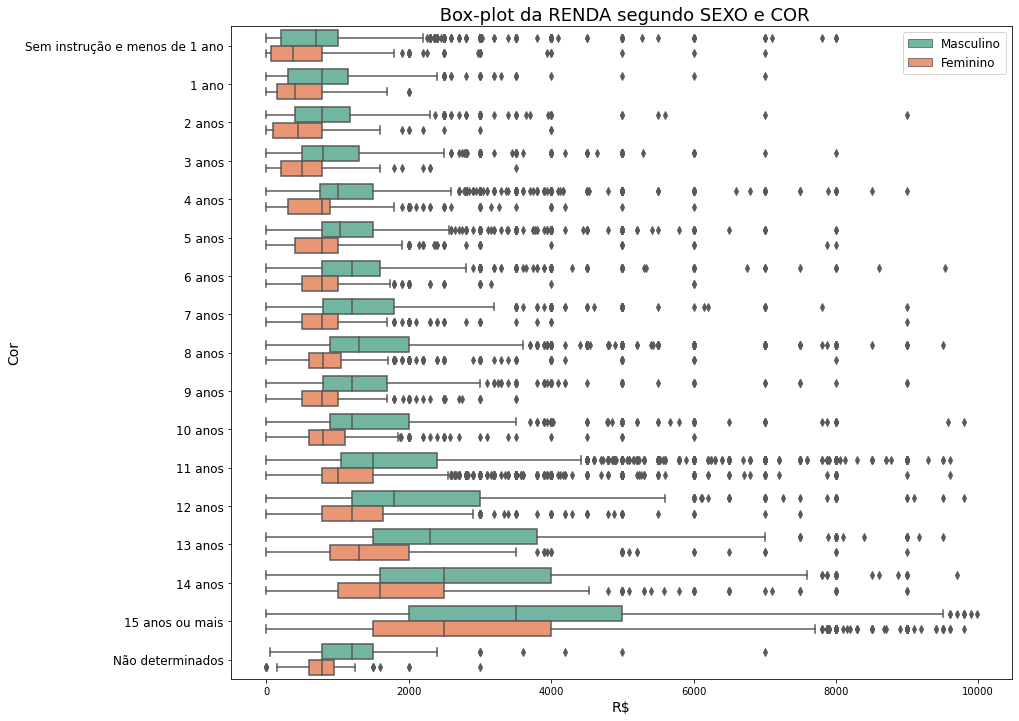

In [115]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue='Sexo', data = df_dados.query('Renda < 10000'), orient = 'h', palette='Set2')

ax.figure.set_size_inches(14, 12)
ax.set_title(' Box-plot da RENDA segundo SEXO e COR' , fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor'  , fontsize=14)

# Configurando label do eixo X
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)

# Configurando label da legenda
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [36]:
df_uf = df_dados.groupby('UF').agg({'Renda':  ['mean', 'median', 'max', 'std']})
df_uf.rename(index = uf, inplace=True)
df_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':' Box-plot da RENDA segundo as UNIDADES DA FEDERAÇÃO'}, xlabel='R$', ylabel='Estado'>

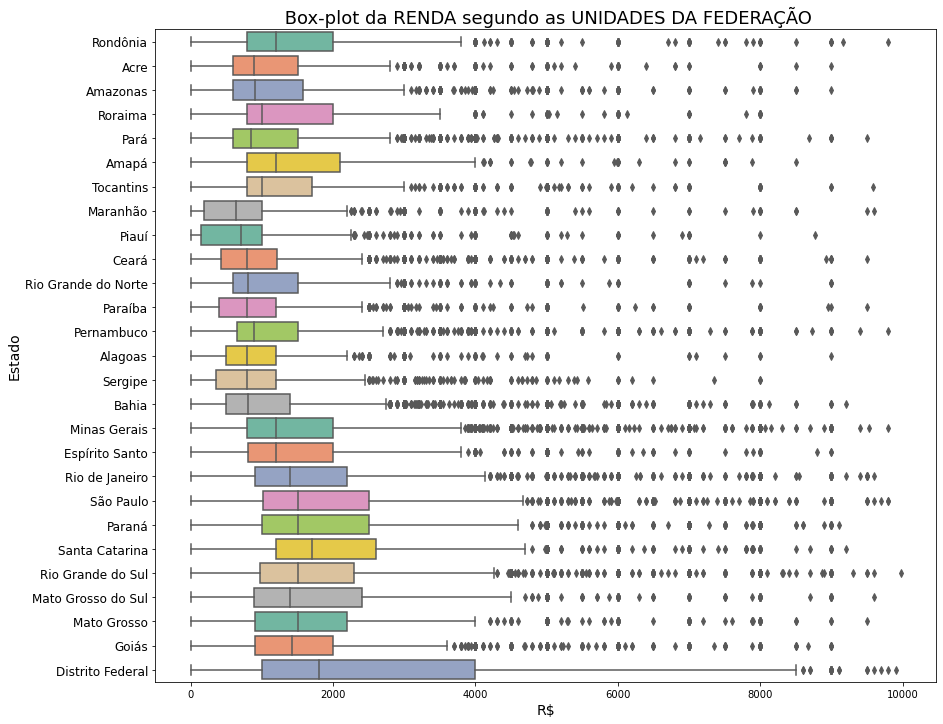

In [121]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = df_dados.query('Renda < 10000'), orient = 'h', palette='Set2')

ax.figure.set_size_inches(14, 12)
ax.set_title(' Box-plot da RENDA segundo as UNIDADES DA FEDERAÇÃO' , fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estado'  , fontsize=14)

# Configurando label do eixo X
ax.set_yticklabels([key for key in uf.values()], fontsize=12)


ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='UF'>

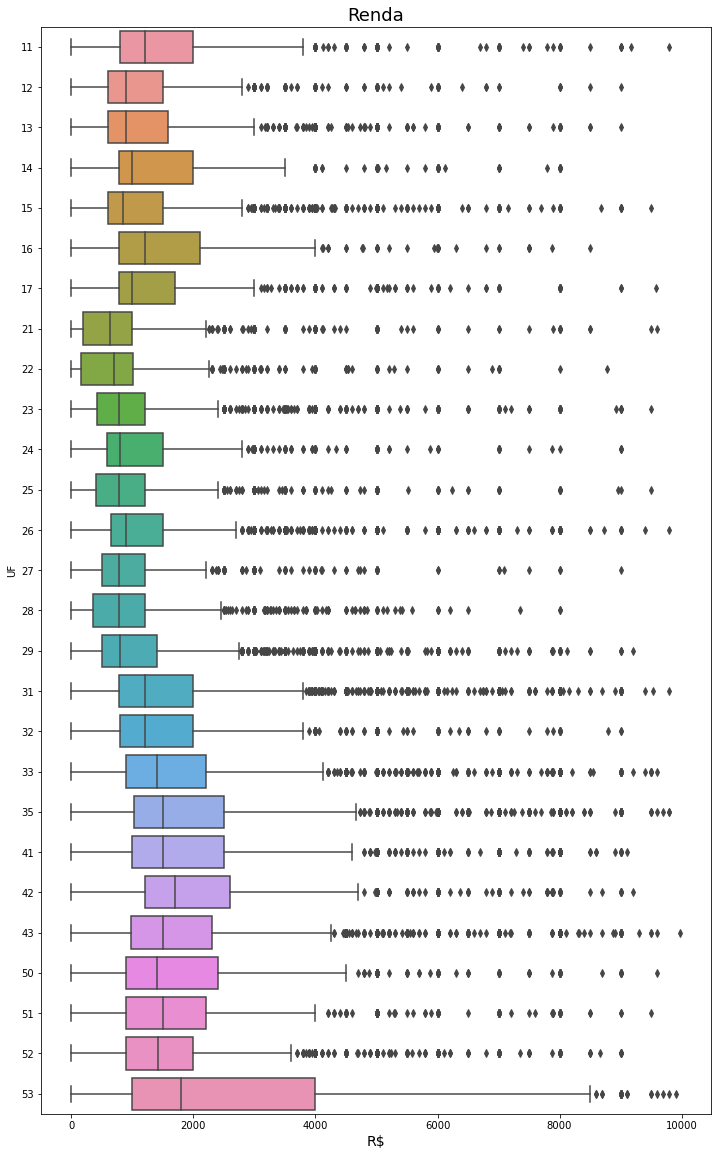

In [37]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = df_dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 20)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...